# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here. Need to write at least 3 observations or inferences from the data
 

In [133]:
# Data Science Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Regression/Modelling Libraries
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [134]:
# Add Data Files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
comb_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
comb_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [135]:
# Check number of mice
comb_df["Mouse ID"].nunique()

249

In [136]:
# Find the duplicate mouse by ID number and Timepoint
comb_df[comb_df.duplicated(["Mouse ID", "Timepoint"])] # Got this from: https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [137]:
# Create a clean DataFrame by removing the duplicate mouse (by its ID)
filt = comb_df["Mouse ID"] != "g989" # Making a filter so all mice that don't have the Mouse ID g989 will be kept
df = comb_df[filt]

In [138]:
# Number of mice in clean DataFrame
df["Mouse ID"].nunique()

248

# Summary Statistics

In [140]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Groupby Drug Regimen and find Mean, Median, Variance, Std. Dev. and Standard Error for the Tumor Volume
tum_mean = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tum_med = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tum_var = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tum_stdv = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tum_sem = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

data = {
    "Mean Tumor Volume": tum_mean,
    "Median Tumor Volume": tum_med,
    "Tumor Volume Variance": tum_var,
    "Tumor Volume Std. Dev.": tum_stdv,
    "Tumor Volume Std. Err.": tum_sem
}

summary_statistics = pd.DataFrame(data)
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

<Axes: title={'center': 'Observed Mouse Timepoints per Drug Regimen'}, xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

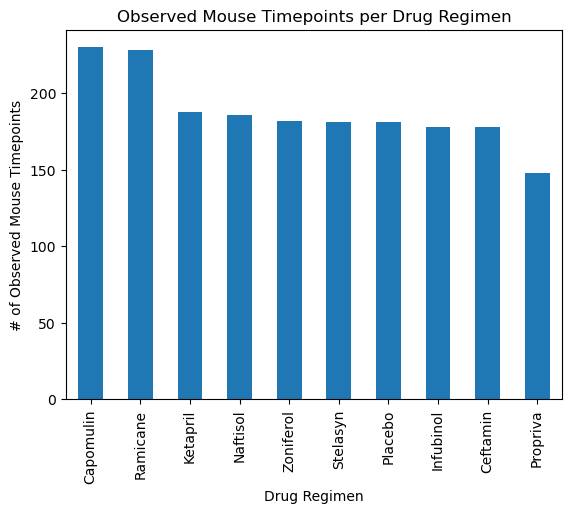

In [141]:
# Pandas bar chart
# Because we need to get a count of each row, making a bar chart of the value counts per each Drug Regimen is best
df["Drug Regimen"].value_counts().plot(kind="bar", ylabel="# of Observed Mouse Timepoints", title="Observed Mouse Timepoints per Drug Regimen")

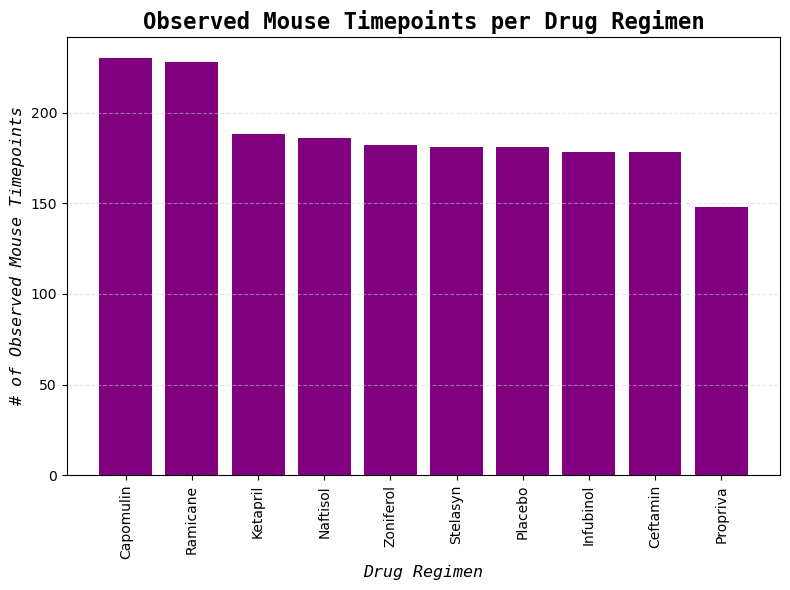

In [142]:
# Pyplot bar chart
# Step 1: Get the data
# Turn Value Counts into a DataFrame to be graphed
df1 = pd.DataFrame(df["Drug Regimen"].value_counts())
x = df1.index
y = df1["count"]
		
# Step 2: Create the Canvas
plt.figure(figsize=(8, 6))

# Step 3: Create Simple Graph
plt.bar(x, y, color = "purple")

# Step 4: Customization
plt.xlabel("Drug Regimen", fontsize=12, fontstyle="italic", fontfamily="monospace")
plt.ylabel("# of Observed Mouse Timepoints", fontsize=12, fontstyle="italic", fontfamily="monospace")
plt.title("Observed Mouse Timepoints per Drug Regimen", fontsize=16, fontweight="bold", fontfamily="monospace")
plt.xticks(rotation=90)

plt.grid(axis="y", color="lightgrey", linestyle="--", alpha=0.5) # alpha is opacity

# Step 5: Show/Save the graph
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Distribution of Male and Female Mice'}, ylabel='count'>

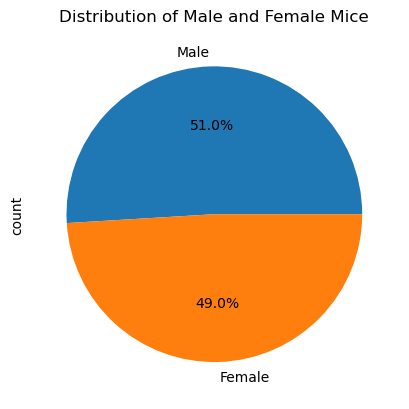

In [146]:
# Pandas pie chart; male vs. female mice
df["Sex"].value_counts().plot.pie(autopct="%1.1f%%", title="Distribution of Male and Female Mice")

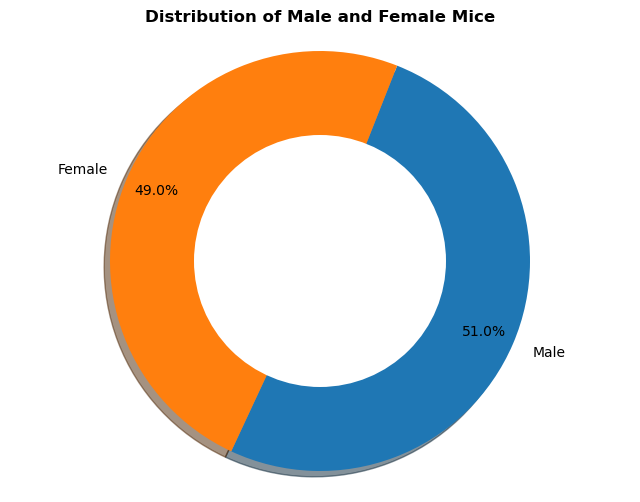

In [145]:
# Pyplot bar chart
# Donut
# Step 1: Get the data
labels =["Male", "Female"]
sex =  df["Sex"].value_counts()

# Step 2: Make the canvas
plt.figure(figsize=(8,6))

# Step 3: Make the barebones plot; 
plt.pie(sex, labels=labels, autopct="%1.1f%%", shadow=True, startangle=245, pctdistance=0.85)

# Step 3.5: Add in the donut hole
# Create the circle
center_circle = plt.Circle((0,0), 0.60, fc="white")
fig = plt.gcf()

# Adding Circle in Pie Chart
fig.gca().add_artist(center_circle)

# Step 4: Customization
plt.title("Distribution of Male and Female Mice", fontweight="bold")
plt.axis("equal") # Centers it

# Step 5: 
plt.show()

# Quartiles, Outliers and Boxplots

In [159]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
maxtime = df.groupby("Mouse ID").Timepoint.max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Used Inner Join on both Mouse ID and Timepoint to ensure only rows with the the last timepoint were kept
# Because I'm creating a new dataframe, the index is being reset and doesn't need to be reset
max_df = pd.merge(maxtime, df, on=["Mouse ID","Timepoint"])
max_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [158]:
max_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].describe()

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,25.0,36.667568,5.715188,23.343598,32.377357,38.125164,40.159220,47.685963
Ceftamin,25.0,57.753977,8.365568,45.000000,48.722078,59.851956,64.299830,68.923185
Infubinol,25.0,58.178246,8.602957,36.321346,54.048608,60.165180,65.525743,72.226731
Ketapril,25.0,62.806191,9.945920,45.000000,56.720095,64.487812,69.872251,78.567014
Naftisol,25.0,61.205757,10.297083,45.000000,52.079510,63.283288,69.563621,76.668817
Placebo,25.0,60.508414,8.874672,45.000000,52.942902,62.030594,68.134288,73.212939
Propriva,24.0,56.493884,8.415626,45.000000,49.119739,55.591622,62.689368,72.455421
Ramicane,25.0,36.191390,5.671539,22.050126,31.560470,36.561652,40.659006,45.220869
Stelasyn,24.0,61.001707,9.504293,45.000000,52.476596,62.192350,69.103944,75.123690


In [180]:
# Put treatments into a list for for loop (and later for plot labels)
tx_group = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
cap = []
ram = []
inf = []
cef = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Got the following code with help from Xpert
for tx in tx_group:
    for index, row in max_df.iterrows():
        if row["Drug Regimen"] == "Capomulin" and tx == "Capomulin":
            cap.append(row["Tumor Volume (mm3)"])
        elif row["Drug Regimen"] == "Ramicane" and tx == "Ramicane":
            ram.append(row["Tumor Volume (mm3)"])
        elif row["Drug Regimen"] == "Infubinol" and tx == "Infubinol":
            inf.append(row["Tumor Volume (mm3)"])
        elif row["Drug Regimen"] == "Ceftamin" and tx == "Ceftamin":
            cef.append(row["Tumor Volume (mm3)"])

# Q3 and Q1 for Capomulin; with help from Xpert and https://www.geeksforgeeks.org/how-to-use-pandas-filter-with-iqr/
q3cap = np.quantile(cap, 0.75)
q1cap = np.quantile(cap, 0.25)
iqrcap = q3cap - q1cap

lower_cap = q1cap - 1.5*iqrcap
upper_cap = q3cap + 1.5*iqrcap

cap_outliers = []


for x in cap:
    if x < lower_cap or x > upper_cap:
        cap_outliers.append(x)
        
print("Capolulin's IQR:", iqrcap, "\nCapomulin's potential outliers:", cap_outliers)

# Q3 and Q1 for Ramicane; with help from Xpert and https://www.geeksforgeeks.org/how-to-use-pandas-filter-with-iqr/
q3ram = np.quantile(ram, 0.75)
q1ram = np.quantile(ram, 0.25)
iqrram = q3ram - q1ram

lower_ram = q1ram - 1.5*iqrram
upper_ram = q3ram + 1.5*iqrram

ram_outliers = []

for x in ram:
    if x < lower_ram or x > upper_ram:
        ram_outliers.append(x)
        
print("Ramicane's IQR:", iqrram, "\nRamicane's potential outliers:", ram_outliers)

# Q3 and Q1 for Infubinol; with help from Xpert and https://www.geeksforgeeks.org/how-to-use-pandas-filter-with-iqr/
q3inf = np.quantile(inf, 0.75)
q1inf = np.quantile(inf, 0.25)
iqrinf = q3inf - q1inf

lower_inf = q1inf - 1.5*iqrinf
upper_inf = q3inf + 1.5*iqrinf

inf_outliers = []

for x in inf:
    if x < lower_inf or x > upper_inf:
        inf_outliers.append(x)
        
print("Infubinol's IQR:", iqrinf, "\nInfubinol's potential outliers:", inf_outliers)

# Q3 and Q1 for Ceftamin; with help from Xpert and https://www.geeksforgeeks.org/how-to-use-pandas-filter-with-iqr/
q3cef = np.quantile(cef, 0.75)
q1cef = np.quantile(cef, 0.25)
iqrcef = q3cef - q1cef

lower_cef = q1cef - 1.5*iqrcef
upper_cef = q3cef + 1.5*iqrcef

cef_outliers = []

for x in cef:
    if x < lower_cef or x > upper_cef:
        cef_outliers.append(x)
        
print("Ceftamin's IQR:", iqrcef, "\nCeftamin's potential outliers:", cef_outliers)

Capolulin's IQR: 7.781863460000004 
Capomulin's potential outliers: []
Ramicane's IQR: 9.098536719999998 
Ramicane's potential outliers: []
Infubinol's IQR: 11.477135160000003 
Infubinol's potential outliers: [36.3213458]
Ceftamin's IQR: 15.577752179999997 
Ceftamin's potential outliers: []


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 2000x1200 with 0 Axes>

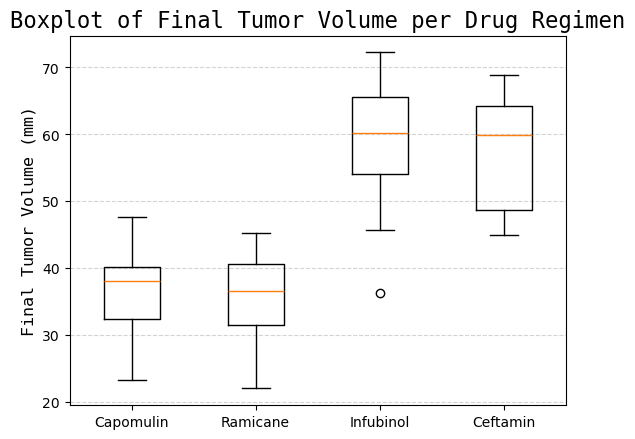

In [187]:
# Box plot that shows the distribution of the tumor volume for each treatment group using Matplotlib
# Created a dictionary and then used it to create subplots with help from Diziet Asahi on https://stackoverflow.com/a/52274064/23471668
dict = {"Capomulin": cap, "Ramicane": ram, "Infubinol": inf, "Ceftamin": cef}

# Step 2: Create the Canvas
plt.figure(figsize=(20,12))

# Step 3: Create a basic plot
fig, ax = plt.subplots()
ax.boxplot(dict.values())

# Step 4: Customize
plt.ylabel("Final Tumor Volume (mm)", fontsize=12, fontfamily="monospace")
plt.title("Boxplot of Final Tumor Volume per Drug Regimen", fontsize=16, fontfamily="monospace")

plt.grid(color="lightgray", axis="y", linestyle="--")
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])


# Step 5: Show and Save
plt.show

# Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Plot colour_intensity versus alcohol on a scatterplot
# Seaborn; 
# Step 1: Get the Data
x = df.color_intensity
y = df.alcohol

# Step 2: Create the plot
sns.scatterplot(x=x, y=y, color="purple") 

# Step 3: Customize
plt.title("Color Intensity v. Alcohol", fontsize=16, fontfamily="monospace")

plt.grid(color="lightgray", axis="y", linestyle="--")

# Step 4: Show and Save
plt.show

# Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Use linregress for this